In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate

In [193]:

df_data=pd.read_table('genetic_data.txt',sep=" ",skiprows=6)
print(df_data)
print(df_data.iloc[:4,:])

      Generation         x         y       f(x,y)       fitness
0              0  0.985390 -1.240430   489.041000  1.000000e-19
1              0 -0.112570  0.453741    20.692000  1.031730e-09
2              0 -0.453536 -0.330297    30.841400  4.034020e-14
3              0  0.629691  1.202960    65.173300  4.961140e-29
4              0  0.065862 -1.097100   122.190000  1.000000e-19
5              0  0.198405  0.953017    84.118500  2.936210e-37
6              0  0.640294 -0.270131    46.383900  7.173290e-21
7              0 -0.715763 -0.704799   151.081000  1.000000e-19
8              0 -1.210420  1.269600     8.708850  1.651180e-04
9              0 -0.326117  0.388140     9.699010  6.134400e-05
10             0  0.443961 -1.451710   272.168000  1.000000e-19
11             0  1.359660  0.570792   163.425000  1.000000e-19
12             0  0.045029 -1.499990   226.517000  1.000000e-19
13             0  0.751994  1.476660    83.083100  8.268910e-37
14             0 -1.473410 -1.073370  10

/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [194]:
#split in Generations
generations=[]
count=0
before=0
tmp_list=[]
for i,gen in enumerate(df_data["Generation"]):
    if gen!=count:
        generations.append(df_data.iloc[before:i-1,:])
        before=i-1
        count+=1
print(generations[9]['fitness'].max())

0.6633899999999999


In [195]:
#find fittest per Generation
fitest=[]
best_sol_x=[]
best_sol_y=[]
for i,gen in enumerate(generations):
    fitest.append(generations[i]['fitness'].max())
    for j,ele in enumerate(generations[i]['fitness']):
        if (generations[i]['fitness'].iloc[j]==fitest[i]):
            best_sol_x.append(generations[i]['x'].iloc[j])
            best_sol_y.append(generations[i]['y'].iloc[j])

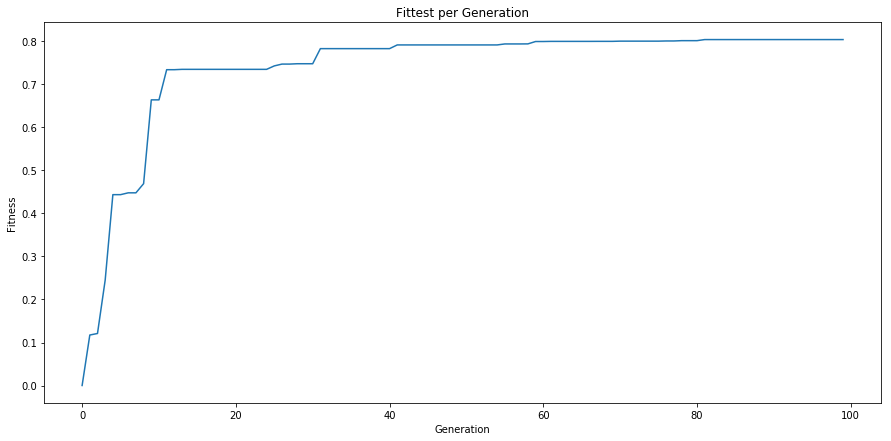

In [196]:
plt.figure(figsize=(15,7))
plt.plot(fitest)
#plt.yscale('log')
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title('Fittest per Generation')
plt.savefig('Fittest.png')

In [197]:
def f(x,y):
    return 100*x**4-200*x**2*y+100*y**2+x**2-2*x+1

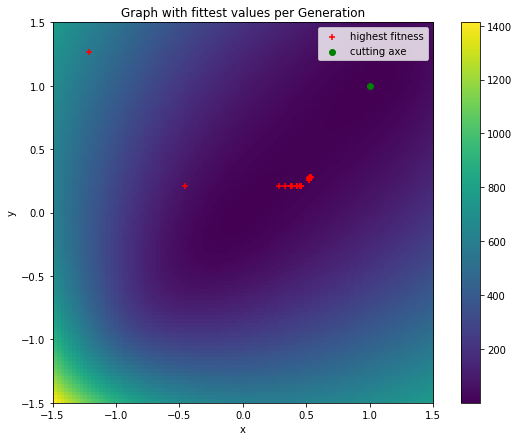

In [198]:
#3D plot, best solution per Generation
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Graph with fittest values per Generation')
ax.scatter(best_sol_x,best_sol_y,c='r',marker='+',label='highest fitness')
ry = np.linspace(-1.5,1.5,100)
rx = np.linspace(-1.5,1.5,100)
x,y  = np.meshgrid(rx,ry)
ax.scatter(1,1,c='g',marker='o',label='cutting axe')
#ax.plot(x,y,f(x,y))
#ax.contour3D(x,y,f(x,y),50) 
#plt.contourf(x,y,f(x,y),50)
rz=f(rx,ry)
rbf = scipy.interpolate.Rbf(rx, ry, rz, function='multiquadric')
z=rbf(x,y)
plt.imshow(z, vmin=rz.min(), vmax=rz.max(), origin='lower', 
           extent=[rx.min(), rx.max(), ry.min(), ry.max()])
plt.colorbar()
plt.legend()
# extent=[rx.min(), rx.max(), ry.min(), ry.max()])
plt.savefig('Graph.png')